In [1]:
import numpy as np

In [2]:
first_column = 0, 10, 20, 30
np.indices((4,5))[1] + np.asarray(first_column).reshape([4,1])

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [3]:
arr = np.random.random((10, 3))
print(arr * (np.abs(arr - 0.5) == np.abs(arr - 0.5).min(1).reshape((10,1))))

[[0.61758548 0.         0.        ]
 [0.37678109 0.         0.        ]
 [0.61874137 0.         0.        ]
 [0.         0.         0.1603457 ]
 [0.24925556 0.         0.        ]
 [0.         0.         0.37884299]
 [0.         0.         0.68926264]
 [0.5815838  0.         0.        ]
 [0.40316436 0.         0.        ]
 [0.         0.64087634 0.        ]]


In [4]:
arr = np.random.random((6, 6))
arr.sum(1) / arr.min(0)

array([363.27139923,   9.27466957,  21.25739554,  53.23900215,
        44.81022115, 153.29961521])

In [5]:
from scipy.ndimage.interpolation import shift
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
(x * shift((x == 0), -1, cval=False)).max()

7

In [6]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x + (np.indices((8, 10))[1] == i.reshape((8, 1))).sum(0)

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

In [7]:
def k_means(array, k, iterations=20, verbose=False, mu_initial=[]):
  dispersion = 1e+10
  for i in range(iterations):
    n_dim = array.shape[1]
    if np.array(mu_initial).tolist() == []:
      mu_old = np.expand_dims(np.random.uniform(array.min(0), array.max(0), (k, n_dim)).transpose(), 0)
    else:
      mu_old = np.tile(np.transpose(mu_initial), (1,1,1))
    while True:
      pre_distances = (np.expand_dims(array, -1) - mu_old)
      pre_distances = pre_distances ** 2
      distances = pre_distances.sum(1)
      claster_mask = distances == distances.min(1).reshape(array.shape[0], 1)
      mu_new = (np.expand_dims(array, -1) * np.tile(claster_mask.reshape((array.shape[0], 1, k)), (1,n_dim,1))).sum(0)
      mu_new /= np.maximum(np.tile(claster_mask.sum(0), (2, 1)), 1)
      if(verbose):
        draw_comp(array, k, mu_old[0], claster_mask, mu_new)
      if np.max(np.abs(mu_old - mu_new)) < 1e-20:
        break
      else:
        mu_old = mu_new
    std = ((np.expand_dims(array, -1) * np.tile(claster_mask.reshape((array.shape[0], 1, k)), (1,n_dim,1))) ** 2).sum(0)
    std = std / np.maximum(np.tile(claster_mask.sum(0), (2, 1)), 1) - mu_new ** 2
    if(std.sum(0).mean() < dispersion):
      dispersion = std.sum(0).mean()
      best_mu = mu_new
      # verification of dispersion
      #   a = np.asarray([0, 0, 0, 0, 0], dtype=np.float32)
      #   _a = np.asarray([0, 0, 0, 0, 0], dtype=np.float32)
      #   for i in np.expand_dims(array, -1) * np.tile(claster_mask.reshape((array.shape[0], 1, k)), (1,n_dim,1)):
      #     for j in range(len(i[0])):
      #       if(i[0][j] != 0):
      #         a[j] += (mu_new[0][j] - i[0][j]) ** 2 + (mu_new[1][j] - i[1][j]) ** 2
      #         _a[j] += 1
      #   for j in range(5):
      #     a[j] /= _a[j]
  return best_mu, dispersion

In [8]:
from matplotlib import rcParams
def draw_comp(data, k,  m_old, claster_mask=[], m_new=[], labels=[]):
  fig, axs = plt.subplots(1, 1)
  colors_list = ['m', 'c', 'g', 'b', 'k', 'y', 
                 'gray', 'violet', 'lime', 'orange', 
                 'darkred', 'tomato', 'aqua', 'coral', 'brown']
  if(np.asarray(claster_mask).tolist() == []):
    pre_distances = (np.expand_dims(data, -1) - m_old)
    pre_distances = pre_distances ** 2
    distances = pre_distances.sum(1)
    claster_mask = distances == distances.min(1).reshape(data.shape[0], 1)
  for i in range(k):
    axs.scatter(*(data[claster_mask[:,i]]).T, c=colors_list[i % len(colors_list)])
  size = rcParams['lines.markersize'] ** 2
  if np.asarray(m_old).tolist() != []:
    axs.scatter(m_old[0], m_old[1], s=size * 2, marker='^', c='r', label='mean')
  if np.asarray(m_new).tolist() != []:
    axs.scatter(m_new[0], m_new[1], s=size * 2, marker='o', c='r', label='mean_new')
  if labels != []:
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
  plt.legend()
  plt.show()

In [9]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:5]
import matplotlib.pyplot as plt
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]

array([[ 1.,  1., 19., 15., 39.],
       [ 2.,  1., 21., 15., 81.],
       [ 3.,  0., 20., 16.,  6.],
       [ 4.,  0., 23., 16., 77.],
       [ 5.,  0., 31., 17., 40.]])

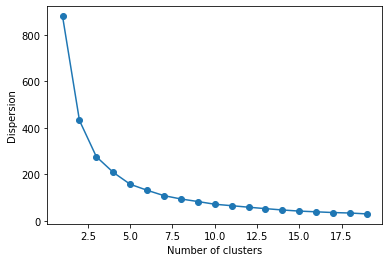

In [10]:
age_income = data[:,[2,3]]
disp_list = []
num_of_exp = 20
for k in range(1, num_of_exp):
  ans = k_means(age_income, k, verbose=False)
  disp_list.append(k_means(age_income, k, verbose=False)[1])
  #draw_comp(age_income, k, ans[0], labels=['Age', 'Annual Income'])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, num_of_exp), disp_list, '-o')
plt.show()

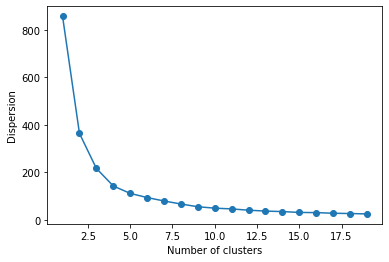

In [11]:
age_score = data[:,[2,4]]
disp_list = []
num_of_exp = 20
for k in range(1, num_of_exp):
  ans = k_means(age_score, k, verbose=False)
  disp_list.append(k_means(age_score, k, verbose=False)[1])
  #draw_comp(age_score, k, ans[0], labels=['Age', 'Spending Score'])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, num_of_exp), disp_list, '-o')

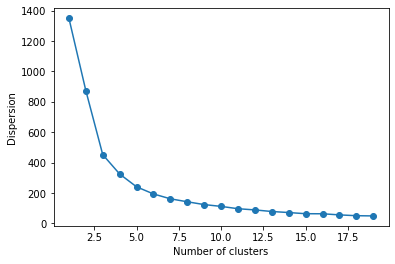

In [12]:
income_score = data[:,[3,4]]
disp_list = []
num_of_exp = 20
for k in range(1, num_of_exp):
  ans = k_means(income_score, k, verbose=False)
  disp_list.append(k_means(income_score, k, verbose=False)[1])
  #draw_comp(income_score, k, ans[0], labels=['Annual Income', 'Spending Score'])
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion')
plt.plot(range(1, num_of_exp), disp_list, '-o')

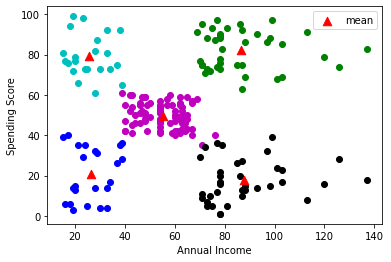

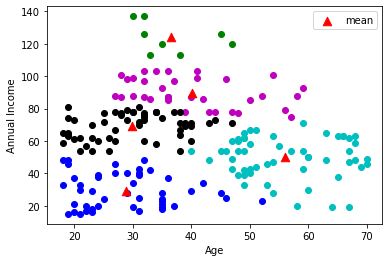

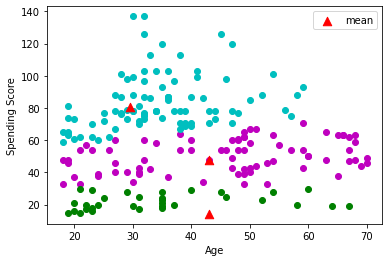

In [13]:
# from scipy.cluster.vq import kmeans
# ans = kmeans(income_score, 5)
ans_custom = k_means(income_score, 5, verbose=False)
draw_comp(income_score, 5, ans_custom[0], labels=['Annual Income', 'Spending Score'])
ans = k_means(age_income, 5, verbose=False)
draw_comp(age_income, 5, ans[0], labels=['Age', 'Annual Income'])
ans = k_means(age_score, 3, verbose=False)
draw_comp(age_income, 3, ans[0], labels=['Age', 'Spending Score'])

Кластеры явно выделяеются только в разразе income-score. Видно, что если разбить покупателей по уровню дохода на 3 группы 0-40 40-70 70-140 и уровню трат 0-40 40-60 60-100, то средние группы по доходам и индексу трат совподают, в то время как группа с самыми высокими(низкими) тратами попадает в группу с самыми высокими и самыми низкими доходами и не пересекается с группой со средними доходами. Это довольно занимательный факт:)